##  Prosper Loan Data Exploration
 
##### By Nada Alruwaythi

##### Investigation Overview
* In this investigation, I wanted to figure out two things:

- 1- The variables that can be utilized to forecast credit default.
- 2- What variables determine Prosper's rating.

Dataset Overview
This data set contains 113937 loans with 81 variables on each loan, for the purpose of this investigation I've taken the following variables: 
 - Term
 - LoanStatus
 - BorrowerRate
 - ProsperRating (Alpha)
 - LoanOriginalAmount
 - ProsperRating (numeric)
 - EmploymentStatus
 - DelinquenciesLast7Years
 - StatedMonthlyIncome
 - Recommendations
 - Investors
 - TotalProsperLoans

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

%matplotlib inline


In [3]:
df = pd.read_csv('prosperLoanData.csv')


## Wrangling


In [7]:
target=['Term','LoanStatus','BorrowerRate', 'ProsperRating (Alpha)','LoanOriginalAmount','ProsperRating (numeric)','EmploymentStatus','DelinquenciesLast7Years','StatedMonthlyIncome','Recommendations','Investors','TotalProsperLoans']
target
target_df = df[target]
target_df.head()
target_df.shape
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)
target_df['StatedMonthlyIncome']=target_df['StatedMonthlyIncome'].astype(int)

# Univariate Exploration

### Loan status


- The majority of the loans in the data set are current loans. Past-due loans are classified into numerous categories based on the length of the payment delay.
- Another significant factor is completed loans, with defaulted loans constituting a minority.

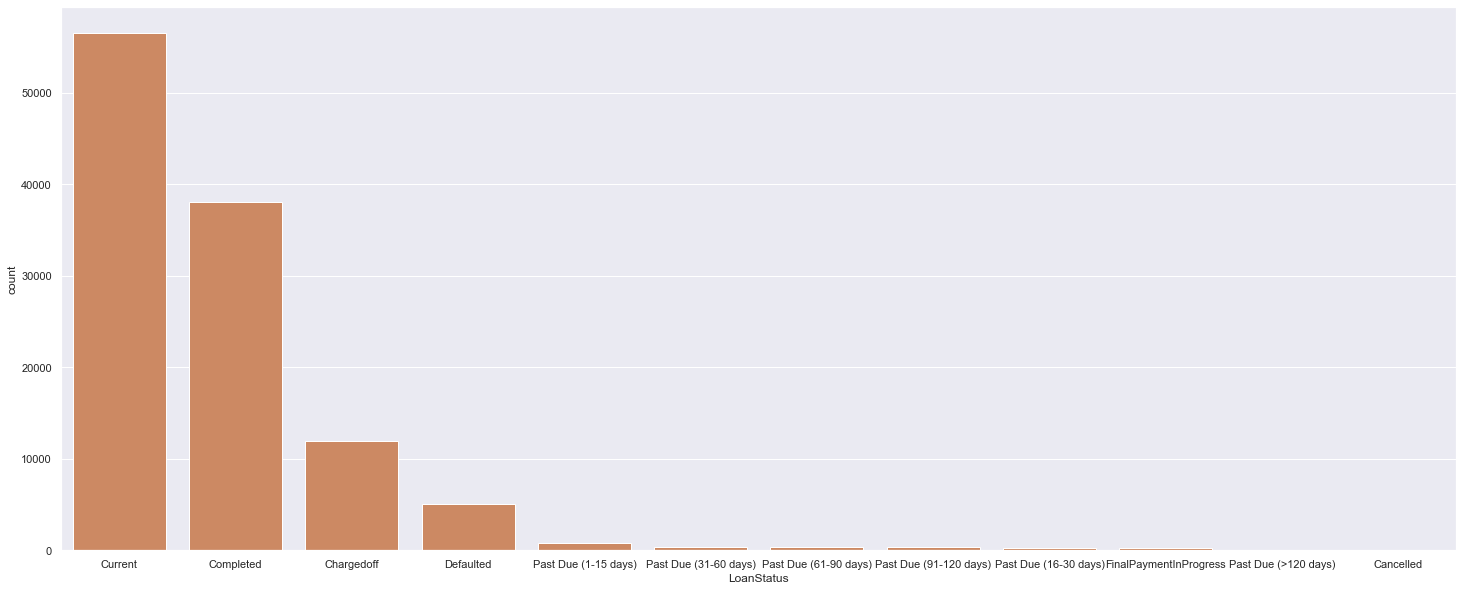

In [8]:
sns.set(rc={'figure.figsize':(25,10)})
freq=target_df['LoanStatus'].value_counts()
order=freq.index
b_color=sns.color_palette()[1]
sns.countplot(data=target_df,x='LoanStatus',color= b_color,order=order);

# Bivariate Exploration

- There is insufficient information on part-time, retired, and unemployed borrowers for the job status variable to demonstrate how it interacts with term and Prosper rating factors. However, it is clear that word and Prosper rating interact in some way. There are proportionally more 60-month loans with B and C grades. Borrowers with HR ratings can only get loans for 36 months.

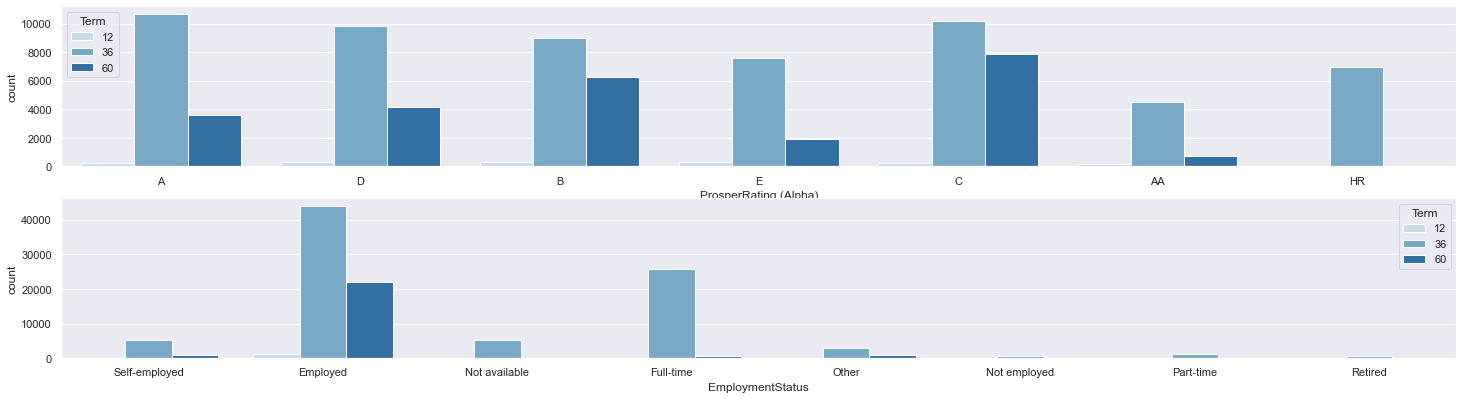

In [10]:
plt.subplot(3, 1, 1)
sns.countplot(data=target_df,x='ProsperRating (Alpha)',hue='Term',palette='Blues');
ax = plt.subplot(3, 1, 2)

sns.countplot(data = target_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues');


# Multivariate Exploration

In [12]:
lisst_df = (target_df.LoanStatus == 'Completed') | (target_df.LoanStatus == 'Defaulted')| (target_df.LoanStatus =='Current') | (target_df.LoanStatus == 'Chargedoff')
target_df = target_df[lisst_df]


def change_(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_, axis=1)
target_df['LoanStatus'].value_counts()

Current      56576
Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

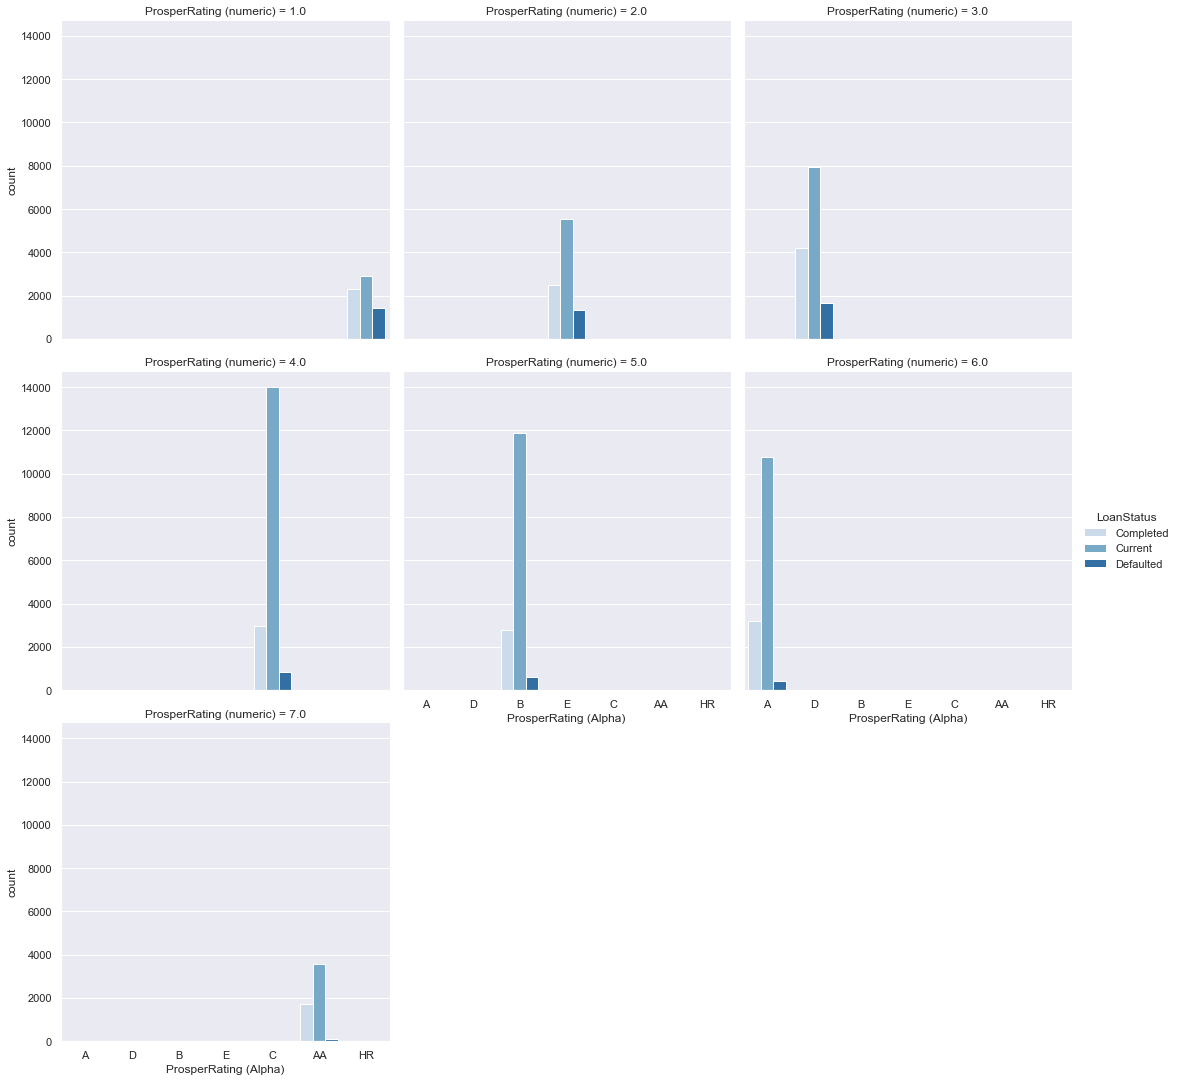

In [13]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ProsperRating (numeric)',data = target_df, kind = 'count', palette = 'Blues', col_wrap = 3);

- Business and home improvement don't have nearly equivalent means at all, with the exception of auto.
- Business-related categories typically have more

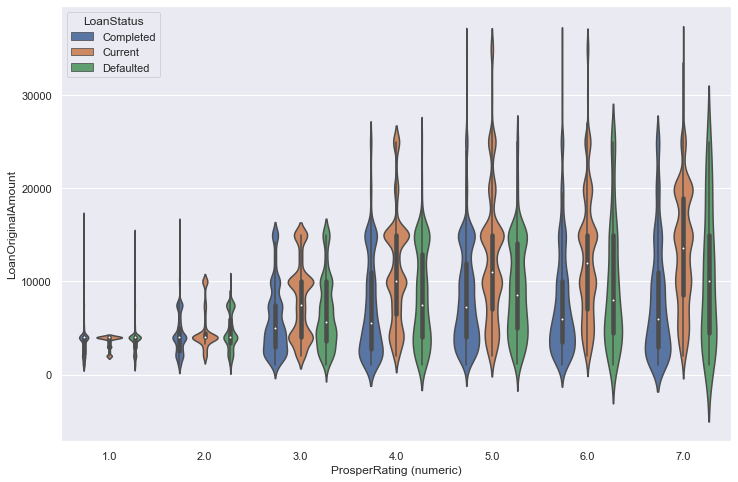

In [14]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=target_df, x='ProsperRating (numeric)', y='LoanOriginalAmount', hue='LoanStatus');